# Visualizing Chipotle's Data

In [11]:
# Step 1. Import the necessary libraries


import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [12]:
# Step 2. Import the dataset from this address.

chipo = pd.read_csv('chipotle.csv')

In [13]:
# Step 3. Assign it to a variable called chipo.

chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [14]:
# Step 4. See the first 10 entries

chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


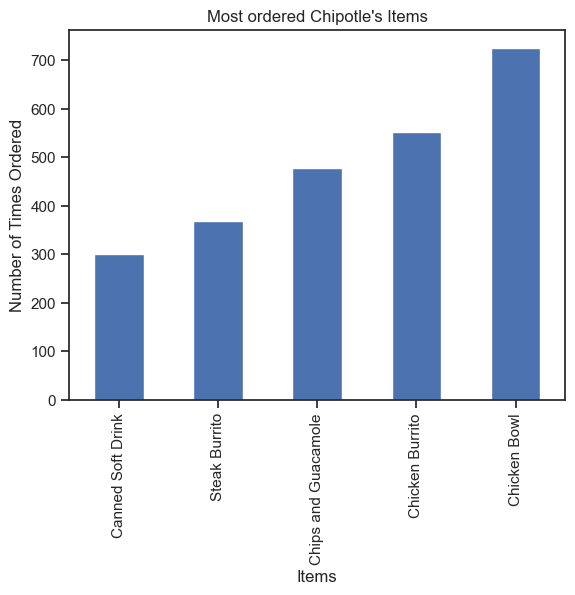

In [15]:
# Step 5. Create a histogram of the top 5 items bought

x = chipo.item_name
letter_counts = Counter(x)
df = pd.DataFrame.from_dict(letter_counts, orient='index')

# sort the values from the top to the least value and slice the first 5 items
df = df[0].sort_values(ascending = True)[45:50]

# create the plot
df.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

plt.show()

C:\Users\tejan\AppData\Local\Temp\ipykernel_1816\1239463816.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orders = chipo.groupby('order_id').sum()


(0.0, 36.7)

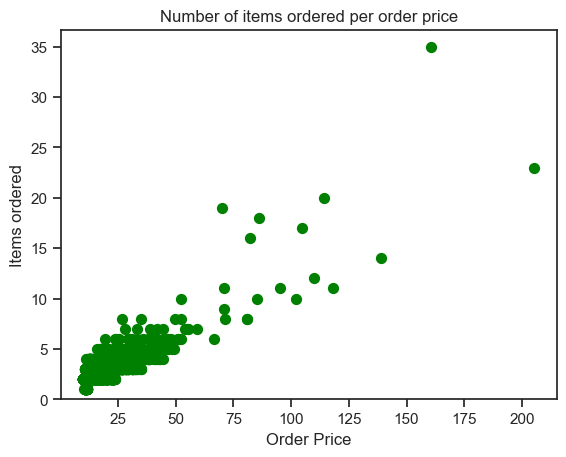

In [16]:
# Step 6. Create a scatterplot with the number of items
# orderered per order price
# Hint: Price should be in the X-axis and Items ordered in the Y-axis

chipo.item_price = [float(value[1:-1]) for value in chipo.item_price]
orders = chipo.groupby('order_id').sum()

# creates the scatterplot
# plt.scatter(orders.quantity, orders.item_price, s = 50, c = 'green')
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

# 

# Online Retails Purchase


In [17]:
# Step 1. Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

In [18]:
# Step 2. Import the dataset from this address.

online_rt = pd.read_csv('Online_Retail.csv', encoding = 'latin1')


In [19]:
# # Step 3. Assign it to a variable called online_rt
# Note: if you receive a utf-8 decode error, set encoding = 'latin1' in pd.read_csv() .

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


C:\Users\tejan\AppData\Local\Temp\ipykernel_1816\4038147782.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  countries = online_rt.groupby('Country').sum()


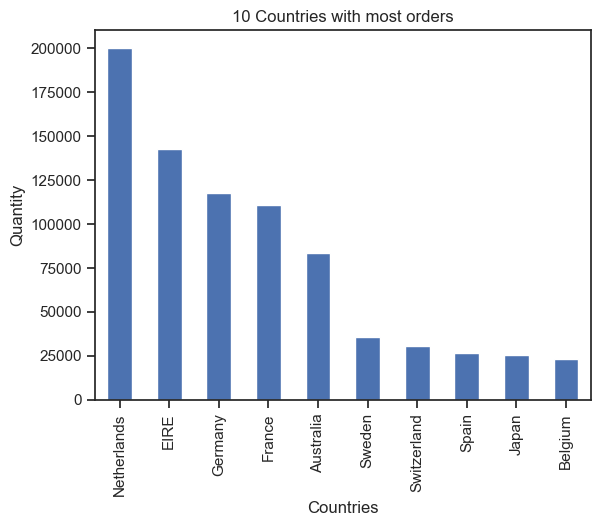

In [20]:
# Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK


countries = online_rt.groupby('Country').sum()
countries = countries.sort_values(by = 'Quantity',ascending = False)[1:11]

# create the plot
countries['Quantity'].plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')
plt.show()

In [21]:
# Step 5. Exclude negative Quantity entries

online_rt = online_rt[online_rt.Quantity > 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


C:\Users\tejan\AppData\Local\Temp\ipykernel_1816\2153476326.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customers = online_rt.groupby(['CustomerID','Country']).sum()


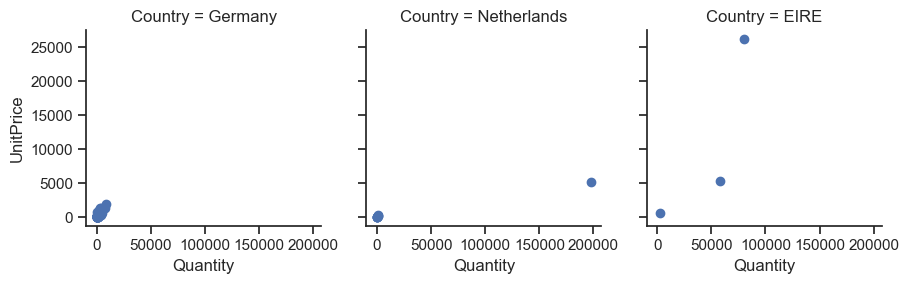

In [22]:
# Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

# groupby CustomerID
customers = online_rt.groupby(['CustomerID','Country']).sum()

# there is an outlier with negative price
customers = customers[customers.UnitPrice > 0]

# get the value of the index and put in the column Country
customers['Country'] = customers.index.get_level_values(1)

# top three countries
top_countries =  ['Netherlands', 'EIRE', 'Germany']

# filter the dataframe to just select ones in the top_countries
customers = customers[customers['Country'].isin(top_countries)]

# creates the FaceGrid
g = sns.FacetGrid(customers, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

# adds legend
g.add_legend()

# Scores

In [23]:
# Step 1. Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [24]:
# Step 2. Create the DataFrame that should look like the one below. 

data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
            'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'], 
            'female': [0, 1, 1, 0, 1],
            'age': [42, 52, 36, 24, 73], 
            'preTestScore': [4, 24, 31, 2, 3],
            'postTestScore': [25, 94, 57, 62, 70]}

df = pd.DataFrame(data, columns = ['first_name', 'last_name', 'age', 'female', 'preTestScore', 'postTestScore'])

df

,first_name,last_name,age,female,preTestScore,postTestScore
0,Jason,Miller,42,0,4,25
1,Molly,Jacobson,52,1,24,94
2,Tina,Ali,36,1,31,57
3,Jake,Milner,24,0,2,62
4,Amy,Cooze,73,1,3,70


Text(0, 0.5, 'preTestScore')

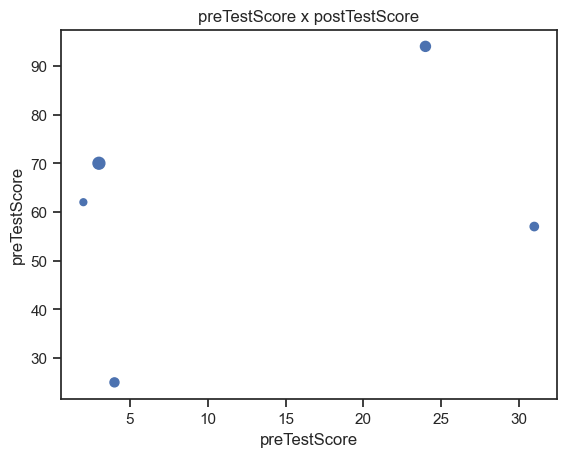

In [25]:
# Step 3. Create a Scatterplot of preTestScore and
# postTestScore, with the size of each point determined by age

plt.scatter(df.preTestScore, df.postTestScore, s=df.age)

plt.title("preTestScore x postTestScore")
plt.xlabel('preTestScore')
plt.ylabel('preTestScore')

Text(0, 0.5, 'preTestScore')

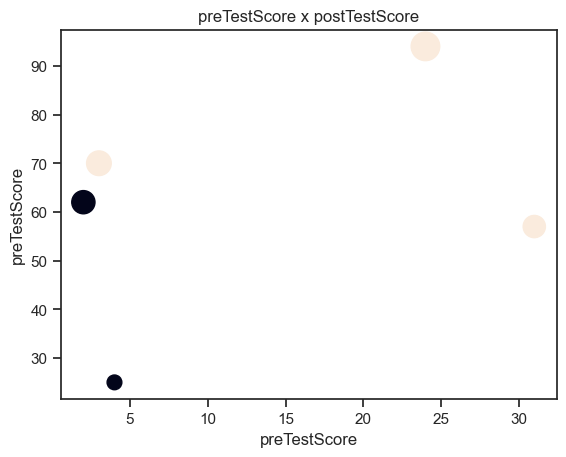

In [26]:
# Step 4. Create a Scatterplot of preTestScore and postTestScore.

plt.scatter(df.preTestScore, df.postTestScore, s= df.postTestScore * 4.5, c = df.female)

#set labels and titles
plt.title("preTestScore x postTestScore")
plt.xlabel('preTestScore')
plt.ylabel('preTestScore')

# 

# Tips

In [27]:
# Step 1. Import the necessary libraries:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")

In [28]:
# Step 2. Import the dataset from this address.

tips = pd.read_csv('tips.csv')


In [29]:
# Step 3. Assign it to a variable called tips

tips

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


In [30]:
# Step 4. Delete the Unnamed 0 column

tips.drop(columns = 'Unnamed: 0' ,inplace=True)

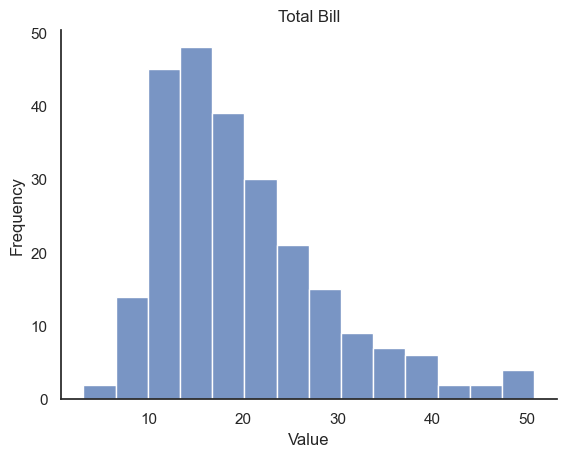

In [31]:
# Step 5. Plot the total_bill column histogram

ttbill = sns.histplot(tips.total_bill);
ttbill.set(xlabel = 'Value', ylabel = 'Frequency', title = "Total Bill")

# take out the right and upper borders
sns.despine()

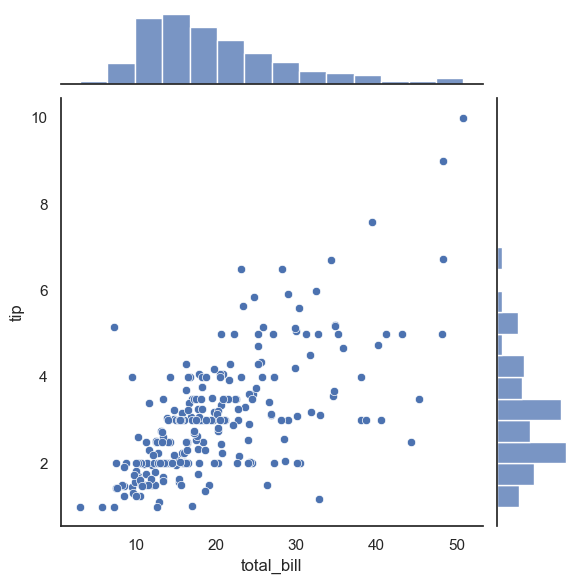

In [32]:
# Step 6. Create a scatter plot presenting the relationship between total_bill and tip

sns.jointplot(x ="total_bill", y ="tip", data = tips)

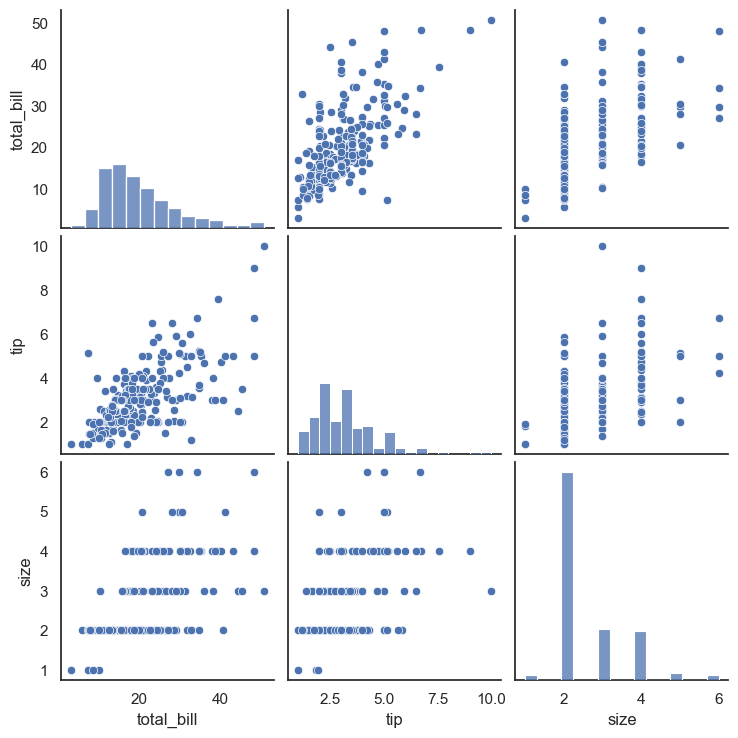

In [33]:
# Step 7. Create one image with the relationship of total_bill, tipand size.
# Hint: It is just one function.

sns.pairplot(tips)

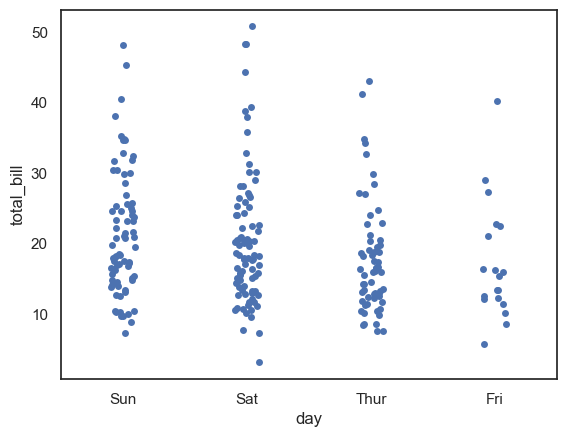

In [34]:
# Step 8. Present the relationship between days and total_bill value

sns.stripplot(x = "day", y = "total_bill", data = tips, jitter = True);

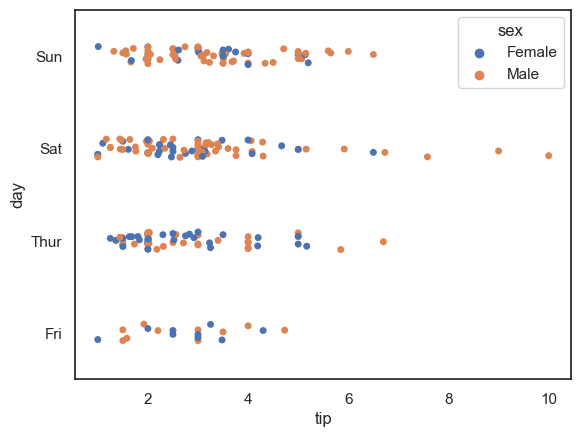

In [35]:
# Step 9. Create a scatter plot with the day as the y-axis and tip
# as the x-axis, differ the dots by sex

sns.stripplot(x = "tip", y = "day", hue = "sex", data = tips, jitter = True);

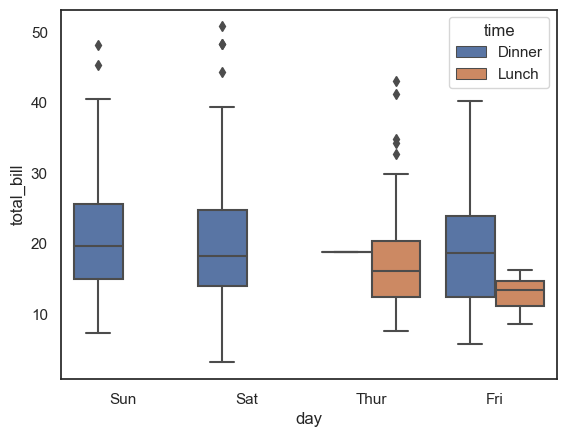

In [36]:
# Step 10. Create a box plot presenting the total_bill per day
# differetiation the time (Dinner or Lunch)

sns.boxplot(x = "day", y = "total_bill", hue = "time", data = tips);

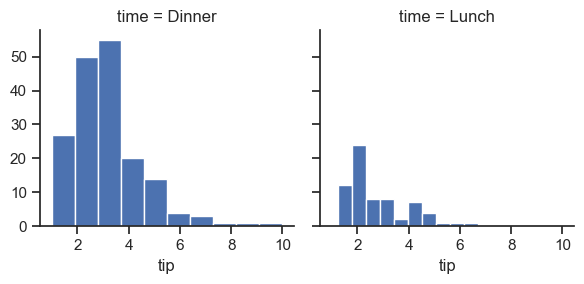

In [37]:
# Step 11. Create two histograms of the tip value based for
# Dinner and Lunch. They must be side by side.

sns.set(style = "ticks")

g = sns.FacetGrid(tips, col = "time")
g.map(plt.hist, "tip");

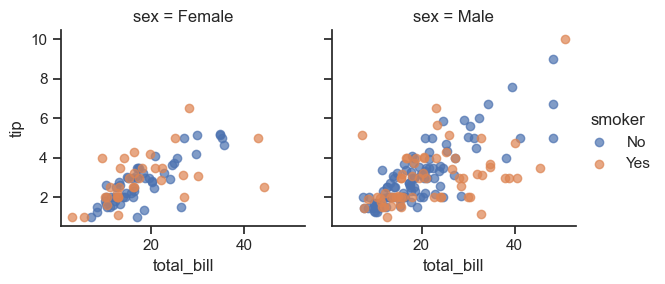

In [38]:
# Step 12. Create two scatterplots graphs, one for Male and
# another for Female, presenting the total_bill value and tip
# relationship, differing by smoker or no smoker

g = sns.FacetGrid(tips, col = "sex", hue = "smoker")
g.map(plt.scatter, "total_bill", "tip", alpha =.7)

g.add_legend();

# 

# Visualizing the Titanic Disaster


In [39]:
# Step 1. Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [40]:
# Step 2. Import the dataset from this address

titanic = pd.read_csv('train.csv')


In [41]:
# Step 3. Assign it to a variable titanic

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
# Step 4. Set PassengerId as the index

titanic.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


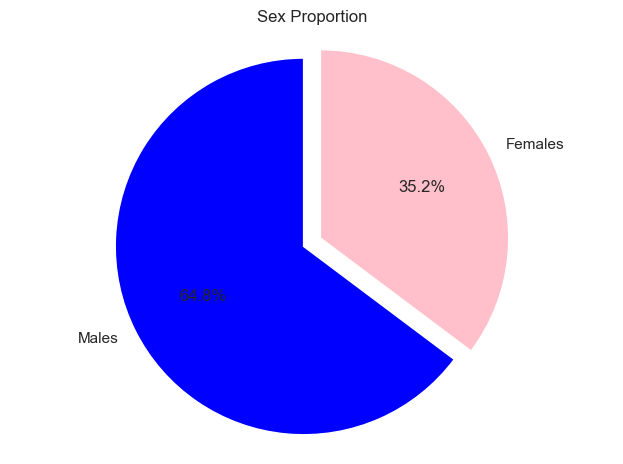

In [43]:
# Step 5. Create a pie chart presenting the male/female proportion

males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()

proportions = [males, females]
plt.pie(proportions, labels = ['Males', 'Females'], shadow = False, colors = ['blue','pink'], explode = (0.100, 0), 
        startangle = 90, autopct = '%1.1f%%' )

plt.axis('equal')
plt.title("Sex Proportion")
plt.tight_layout()
plt.show()

(-5.0, 85.0)

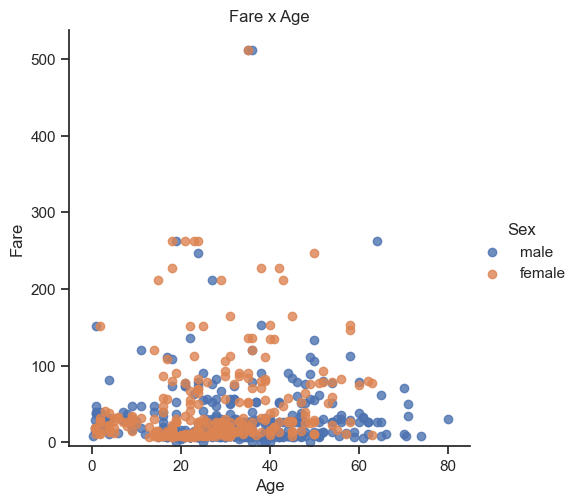

In [44]:
# Step 6. Create a scatterplot with the Fare payed and the Age,differ the plot color by gender

lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False)

lm.set(title = 'Fare x Age')

axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

In [45]:
# Step 7. How many people survived?

titanic.Survived.sum()

342

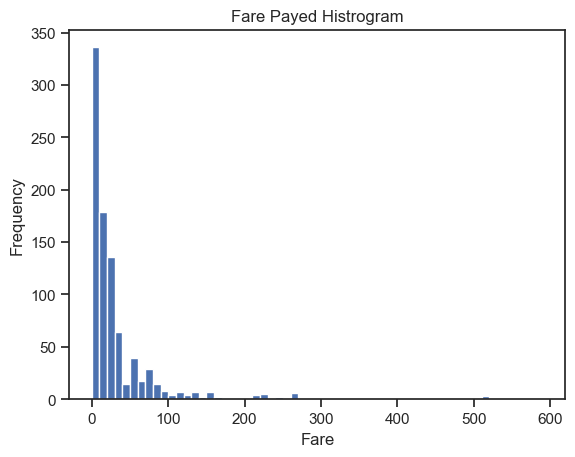

In [46]:
# Step 8. Create a histogram with the Fare payed

df = titanic.Fare.sort_values(ascending = False)
df

binsVal = np.arange(0,600,10)
binsVal

plt.hist(df, bins = binsVal)

plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')

plt.show()